In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import files
uploaded = files.upload()

Saving 129646813_flux_sim.csv to 129646813_flux_sim.csv


In [5]:
df = pd.read_csv("129646813_flux_sim.csv")
X = df[['pdcsap_flux_arma']].values
X_scaled = StandardScaler().fit_transform(X)  # Standardize for better performance

In [6]:
### 1. Isolation Forest ###
isoforest = IsolationForest(contamination=0.01, random_state=42)
df['iso_outlier'] = isoforest.fit_predict(X_scaled)  # -1 indicates anomaly

In [7]:
### 2. Gaussian Mixture Model (GMM) ###
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
df['gmm_cluster'] = gmm.fit_predict(X_scaled)  # Anomalies can be lowest probability cluster

In [8]:
### 3. DBSCAN ###
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Tune eps & min_samples for best results
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)  # -1 indicates anomaly

In [16]:
# Save processed data with anomaly labels
df.to_csv("TESS_lightcurve_anomalies.csv", index=False)

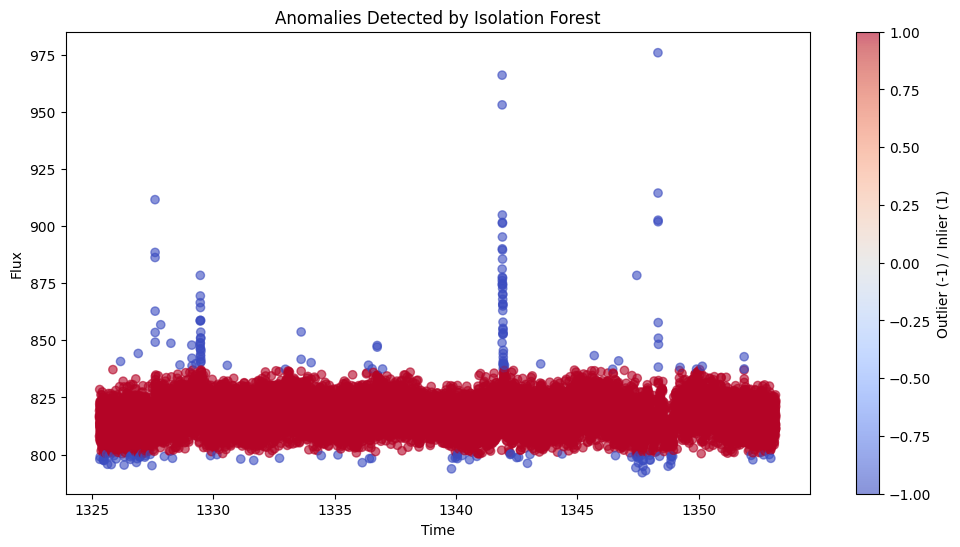

In [13]:
# Plot Isolation Forest
plt.figure(figsize=(12, 6))
plt.scatter(df['time'], df['pdcsap_flux_arma'], c=df['iso_outlier'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('Anomalies Detected by Isolation Forest')
plt.colorbar(label="Outlier (-1) / Inlier (1)")
plt.show()

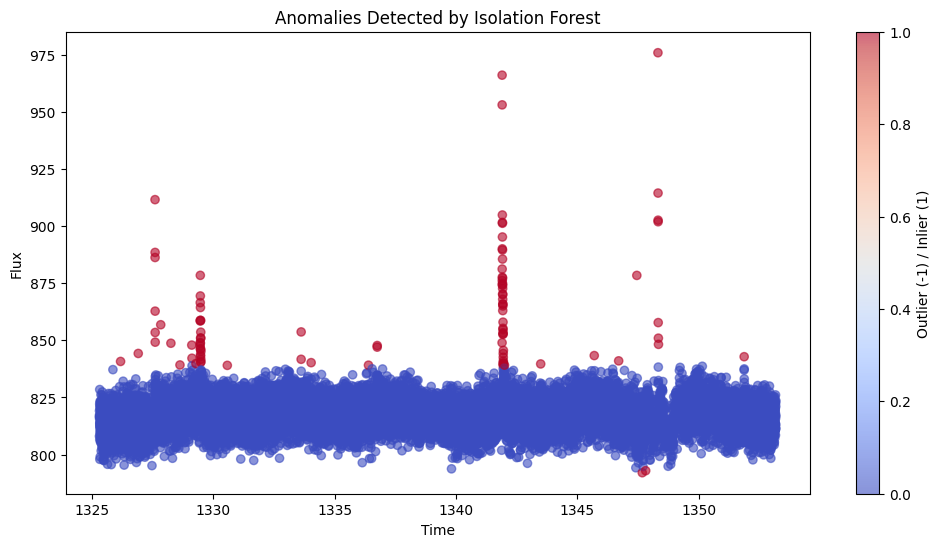

In [14]:
## Plot GMM
plt.figure(figsize=(12, 6))
plt.scatter(df['time'], df['pdcsap_flux_arma'], c=df['gmm_cluster'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('Anomalies Detected by Isolation Forest')
plt.colorbar(label="Outlier (-1) / Inlier (1)")
plt.show()

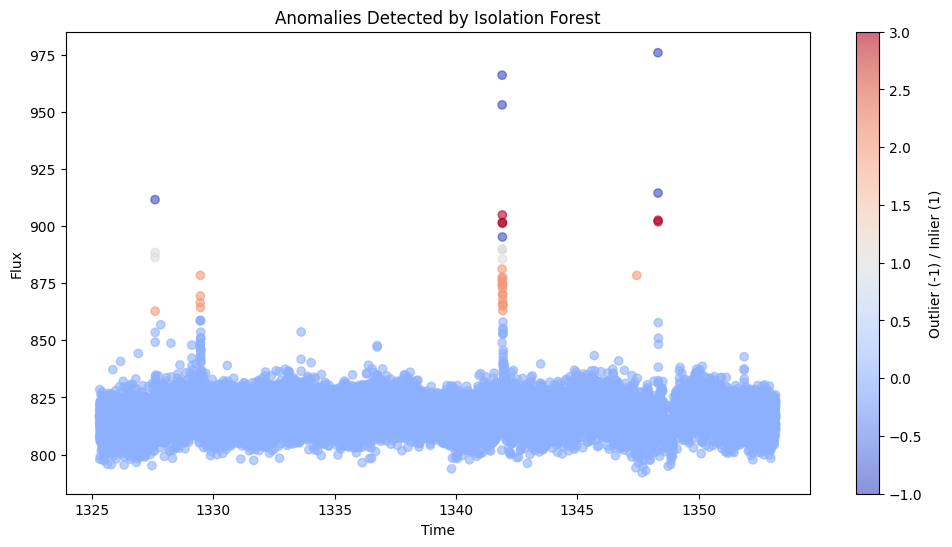

In [15]:
## Plot DBSCAN
plt.figure(figsize=(12, 6))
plt.scatter(df['time'], df['pdcsap_flux_arma'], c=df['dbscan_cluster'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('Anomalies Detected by Isolation Forest')
plt.colorbar(label="Outlier (-1) / Inlier (1)")
plt.show()